In [11]:
# Packages importation
import pandas as pd
import numpy as np
from tqdm import tqdm

In [3]:
# Data importation
data_a = pd.read_csv("~/work/data_2019a_full.csv", sep=';', on_bad_lines='warn', encoding='latin')
data_b = pd.read_csv("~/work/data_2019b_full.csv", sep=';', on_bad_lines='warn', encoding='latin')

data = pd.concat([data_a, data_b], ignore_index=True)

In [8]:
# Random sample
tqdm.pandas()
df = data.sample(n=100000, random_state=0).copy()

## Descriptive statistics

In [30]:
df['salmin_etp'] = np.log(df['salmin_etp'])
df['salmin_etp'].describe()

count    100000.000000
mean          9.953271
std           0.205823
min           9.812175
25%           9.815601
50%           9.862666
75%           9.997423
max          13.159081
Name: salmin_etp, dtype: float64

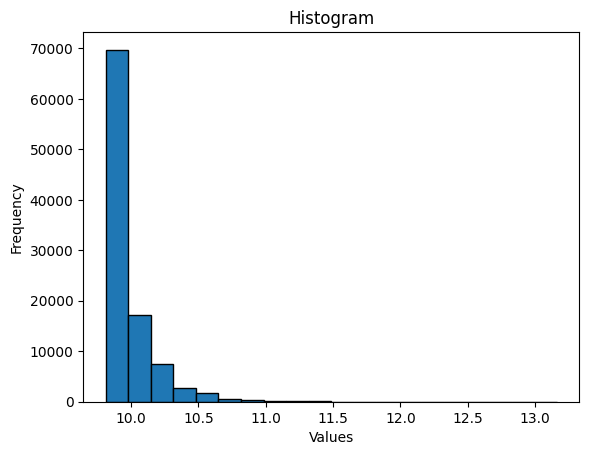

In [33]:
import matplotlib.pyplot as plt

# Create histogram
plt.hist(df['salmin_etp'], bins=20, edgecolor='black')

# Set labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram')

# Display the histogram
plt.show()


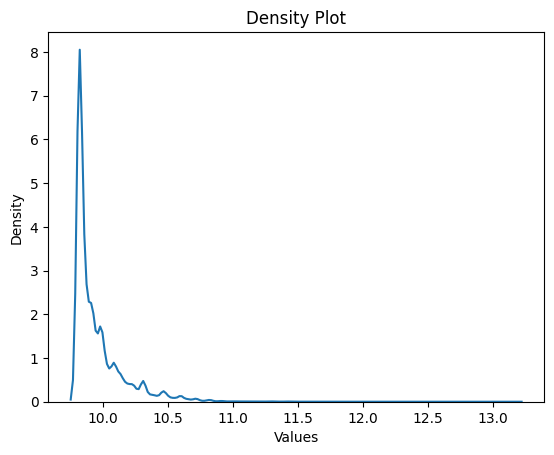

In [34]:
import seaborn as sns

# Create density plot
sns.kdeplot(df['salmin_etp'])

# Set labels and title
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Density Plot')

# Display the density plot
plt.show()


In [38]:
np.log(df['salmax_etp']).describe()

count    66812.000000
mean        10.115830
std          0.327604
min          9.812175
25%          9.907915
50%         10.035315
75%         10.225571
max         17.866365
Name: salmax_etp, dtype: float64

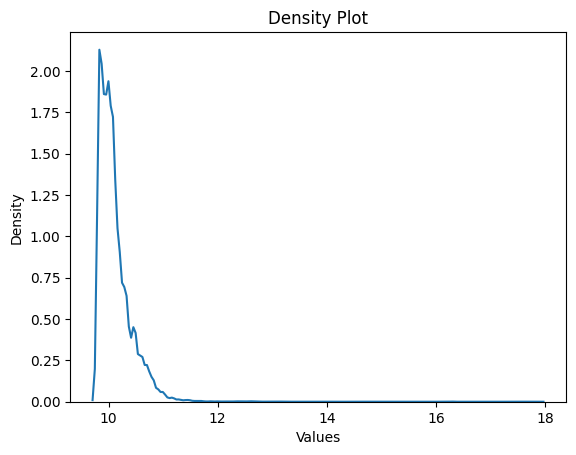

In [37]:
import seaborn as sns

# Create density plot
sns.kdeplot(np.log(df['salmax_etp']))

# Set labels and title
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Density Plot')

# Display the density plot
plt.show()

In [63]:
data_spe = pd.read_csv("~/work/data_spe.csv", parse_dates=[2], infer_datetime_format=True, low_memory=False, on_bad_lines='warn',encoding='latin')
data_spe.head(5)

Skipping line 350203: expected 51 fields, saw 61



,Unnamed: 0,kc_offre,dd_datecreationreport,dc_intituleoffre,dc_descriptifoffre,dc_descriptifentreprise,dc_rome_id,salmin_year,salmax_year,salmin_etp,...,dc_specificites31,dc_specificites32,dc_specificites33,dc_specificites34,dc_specificites35,dc_specificites36,dc_specificites37,dc_specificites38,dc_specificites39,dc_specificites40
0,1,142XPQG,2022-10-20 22:00:00+00:00,Chauffagiste F/H (H/F),Vous intÃ©grerez une entreprise de grande reno...,"Notre mÃ©tier, c'est l'emploi. Des milliers d'...",F1603,NaN,NaN,20148.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,142VZJX,2022-10-20 22:00:00+00:00,Plombier Chauffagiste (h/f),Nous recherchons pour notre client un Plombier...,"Premier rÃ©seau d'agences d'emploi en France, ...",F1603,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,142VZFQ,2022-10-20 22:00:00+00:00,Boulanger (h/f),Adecco de La FlÃ¨che recherche un Boulanger h/...,"Premier rÃ©seau d'agences d'emploi en France, ...",D1102,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,142XPHD,2022-10-20 22:00:00+00:00,Boulanger (H/F),cherche boulanger pour travailler de journÃ©e ...,Entreprise familiale,D1102,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,142XNLX,2022-10-20 22:00:00+00:00,EmployÃ© polyvalent / EmployÃ©e polyvalente de...,L'employÃ© (e) polyvalent (e) de restauration ...,NaN,G1603,20148.0,20160.0,20148.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
df_spe = data_spe[~data_spe['salmin_etp'].isnull()]
print(data_spe.shape)
print(df_spe.shape)

(420433, 51)
(319509, 51)


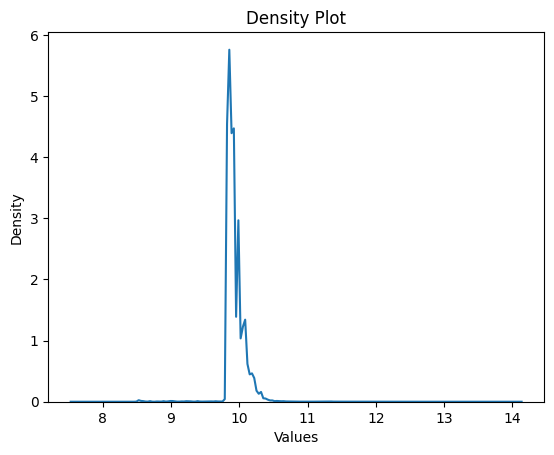

In [67]:
# Create density plot
sns.kdeplot(np.log(df_spe['salmin_etp']))

# Set labels and title
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Density Plot')

# Display the density plot
plt.show()

## Fixed effects regression

In [85]:
fixed_effects = pd.get_dummies(df['dc_rome_id'])
fixed_effects

,A1101,A1201,A1202,A1203,A1204,A1205,A1301,A1302,A1303,A1401,...,N4105,N4201,N4202,N4203,N4204,N4301,N4302,N4401,N4402,N4403
1510713,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
337795,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1998169,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1342237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1515205,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031653,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1741749,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
960211,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
328803,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
data_with_fixed_effects = pd.concat([df, fixed_effects], axis=1)

In [87]:
data_with_fixed_effects.shape

(100000, 517)

In [17]:
data_with_fixed_effects['salmin_etp']=np.log(data_with_fixed_effects['salmin_etp'])

In [39]:
data_with_fixed_effects['salmax_etp']=np.log(data_with_fixed_effects['salmax_etp'])

In [54]:
import statsmodels.api as sm
y = data_with_fixed_effects['salmin_etp']
X = fixed_effects
X = sm.add_constant(X)

In [55]:
from sklearn.model_selection import train_test_split
test_size=0.2
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=test_size, random_state=0)

In [56]:
model = sm.OLS(y_train, x_train)
results = model.fit()

In [57]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             salmin_etp   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     127.7
Date:                Wed, 19 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:37:49   Log-Likelihood:                 36538.
No. Observations:               80000   AIC:                        -7.207e+04
Df Residuals:                   79496   BIC:                        -6.739e+04
Df Model:                         503                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0084      0.002   4359.020      0.0

In [58]:
predicted_values = results.predict(x_test)
residuals = y_test - predicted_values
squared_residuals = residuals ** 2
mean_squared_error = squared_residuals.mean()
rmse = np.sqrt(mean_squared_error)
print(rmse)

0.15332909525100324


In [59]:
sse_test = ((y_test - predicted_values) ** 2).sum()
sst_test = ((y_test - y_test.mean()) ** 2).sum()
r_squared_test = 1 - (sse_test / sst_test)
print(r_squared_test)

0.4398797556479822


## With PE data

In [88]:
df_spe_f = df_spe.sample(n=100000, random_state=0).copy()

In [89]:
fixed_effetcs = pd.get_dummies(df_spe_f['dc_rome_id'])
fixed_effects

,A1101,A1201,A1202,A1203,A1204,A1205,A1301,A1302,A1303,A1401,...,N4105,N4201,N4202,N4203,N4204,N4301,N4302,N4401,N4402,N4403
1510713,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
337795,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1998169,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1342237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1515205,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031653,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1741749,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
960211,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
328803,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
df_spe_fe = pd.concat([df_spe_f, fixed_effects], axis=1)
df_spe_fe = df_spe_fe.head(100000).reset_index(drop=True)

In [101]:
df_spe_fe.shape

(100000, 561)

In [102]:
df_spe_fe['salmin_etp']=np.log(df_spe_fe['salmin_etp'])
df_spe_fe['salmin_etp'].describe()

count    100000.000000
mean          9.934019
std           0.155157
min           8.432452
25%           9.859489
50%           9.906682
75%           9.980449
max          14.098582
Name: salmin_etp, dtype: float64

In [111]:
import statsmodels.api as sm
y = df_spe_fe['salmin_etp']
X = fixed_effects.reset_index(drop=True)
X = sm.add_constant(X)

In [112]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [113]:
model = sm.OLS(y_train, x_train)
results = model.fit()

In [114]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             salmin_etp   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8599
Date:                Thu, 20 Jul 2023   Prob (F-statistic):              0.989
Time:                        13:40:15   Log-Likelihood:                 35219.
No. Observations:               80000   AIC:                        -6.943e+04
Df Residuals:                   79496   BIC:                        -6.475e+04
Df Model:                         503                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.9126      0.002   4246.655      0.0

In [115]:
predicted_values = results.predict(x_test)
residuals = y_test - predicted_values
squared_residuals = residuals ** 2
mean_squared_error = squared_residuals.mean()
rmse = np.sqrt(mean_squared_error)
print(rmse)

0.15129268164671708


In [116]:
sse_test = ((y_test - predicted_values) ** 2).sum()
sst_test = ((y_test - y_test.mean()) ** 2).sum()
r_squared_test = 1 - (sse_test / sst_test)
print(r_squared_test)

-0.006465341337572816
